# IMERSÃO DADOS 4 - VALORES DE IMÓVEIS

### DIA 01

## IMPORTAÇÃO DE BIBLIOTECAS

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORTAÇÃO DO DATASET

In [38]:
link = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
dataset = pd.read_csv(link)
dataset.head(11)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000


In [39]:
#Visualizar o tamanho do dataset
print(f'O dataset possui {dataset.shape[0]} linhas e {dataset.shape[1]} colunas')

O dataset possui 10008 linhas e 8 colunas


In [40]:
#Visualizar as colunas do dataset
dataset.columns.values

array(['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros',
       'Vagas', 'Valor'], dtype=object)

In [41]:
#Visualizar algumas informações em geral
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [42]:
#Visualizar quantidades de valores nulos
dataset.isnull().sum()

Rua          3434
Bairro         12
Cidade          0
Metragem        0
Quartos         0
Banheiros       0
Vagas           0
Valor           0
dtype: int64

<AxesSubplot:>

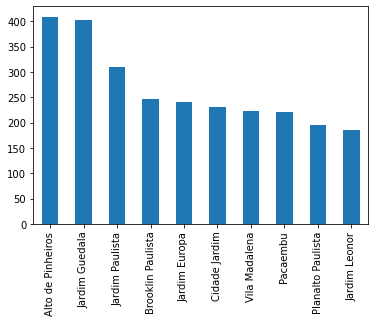

In [43]:
#Plot simples de um grafico de barra com os 10 bairros que mais aparecem no dataset
qtd_bairros = dataset['Bairro'].value_counts()
qtd_bairros.head(10).plot.bar()

### DIA 02 - TRATAMENTO DE DADOS

In [44]:
# Separando a coluna 'Valor'
# Com o 'split' estamos separando os dados
# O 'expand = True' estamos criando colunas para os dados separados
# E então estamos inserindo no nosso dataset colocando nomes para cada colunas
dataset[['Moeda', 'Valor_anuncio', 'Tipo']] = dataset['Valor'].str.split(expand = True)
dataset.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [45]:
#Verificando que existe tipo 'Mes, Ano, Dia' no nosso dataset'Tipo' então iremos remover pois se trata de aluguéis.
dataset['Tipo'].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [46]:
#Inserindo apenas os dados em que o Tipo é 'None' no nosso dataset
dataset = dataset[dataset['Tipo'].isnull()]

In [47]:
#Removendo o '.' da coluna 'Valor_anuncio'
dataset['Valor_anuncio'] = dataset['Valor_anuncio'].str.replace('.', '')

<ipython-input-47-bc4bf7ffeed7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dataset['Valor_anuncio'] = dataset['Valor_anuncio'].str.replace('.', '')


In [48]:
#Convertendo do tipo 'object' para 'float'
dataset['Valor_anuncio'] = dataset['Valor_anuncio'].astype(float)

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor          9156 non-null   object 
 8   Moeda          9156 non-null   object 
 9   Valor_anuncio  9156 non-null   float64
 10  Tipo           0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


<AxesSubplot:ylabel='Frequency'>

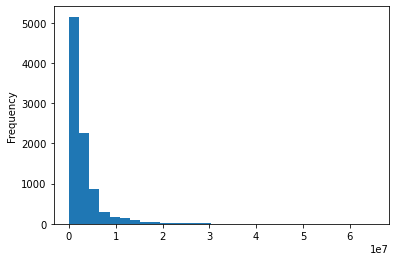

In [50]:
#Histograma do 'Valor_anuncio'
dataset['Valor_anuncio'].plot.hist(bins=30)

(0.0, 10000000.0)

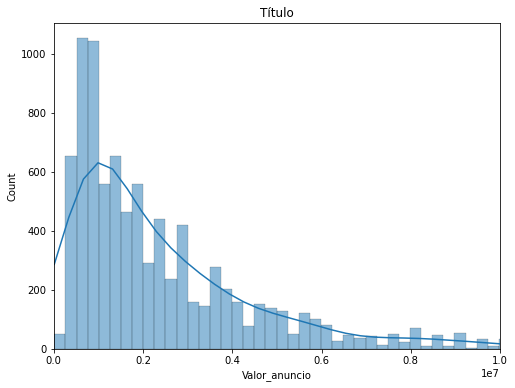

In [51]:
#Histograma do 'Valor_anuncio' usando a biblioteca 'seaborn'
#'figsize' para mudar o tamanho da imagem
#'kde = True', para aparecer a linha de curva
#'xlim' para mudar o eixo x
plt.figure(figsize=(8,6))
ax = sns.histplot(data=dataset, x='Valor_anuncio', kde=True)
ax.set_title('Título')
plt.xlim(0, 10000000)

### Desafios

#### Realizar a média da metragem para cada um dos bairros

In [52]:
bairros_d = dataset.groupby('Bairro')
bairros_d['Metragem'].mean()

Bairro
Aclimação            246.164557
Alto da Boa Vista    418.875000
Alto da Lapa         299.250000
Alto da Mooca        270.050000
Alto de Pinheiros    429.853659
                        ...    
Vila Água Funda      152.200000
Água Branca          173.583333
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            186.166667
Name: Metragem, Length: 697, dtype: float64

#### Pegar outras estatísticas dos dados (como média, mediana, mim, max)

In [53]:
dataset.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


#### Descobrir quais são os bairros que não tem nome de rua

In [54]:
nulos_d = dataset['Rua'].isnull()
list(dataset[nulos_d].Bairro.unique())

['Jardim Morumbi',
 'Jardim Luzitânia',
 'Parque da Lapa',
 'Chácara Santo Antônio (Zona Sul)',
 'Jardim Guedala',
 'Vila Arriete',
 'Alto de Pinheiros',
 'Planalto Paulista',
 'Vila Moinho Velho',
 'Brooklin Paulista',
 'Sumaré',
 'Jardim Paulista',
 'Vila Gustavo',
 'Jardim Trussardi',
 'Vila Madalena',
 'Jardim dos Estados',
 'Vila Santos',
 'Jardim Europa',
 'Butantã',
 'Jardim Petrópolis',
 'Vila Mariana',
 'Vila Aparecida',
 'Siciliano',
 'Alto da Lapa',
 'Jardim da Glória',
 'Vila Ida',
 'Cidade Jardim',
 'Cidade Dutra',
 'Água Fria',
 'Parque Boturussu',
 'Belenzinho',
 'Jardim Panorama',
 'Jardim Ampliação',
 'Lauzane Paulista',
 'Vila Sabrina',
 'Vila Olímpia',
 'Jardim Franca',
 'Santo Amaro',
 'Mooca',
 'Jardim América',
 'Pacaembu',
 'Jardim Santo Amaro',
 'Vila Matilde',
 'Vila Prudente',
 'Vila Nova Conceição',
 'Jardim Camargo Novo',
 'Jardim Planalto',
 'Santana',
 'Jardim Patente Novo',
 'Jardim das Camélias',
 'Jardim Virginia Bianca',
 'Jardim Viana',
 'Jardim Célia

#### Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

(0.0, 10000000.0)

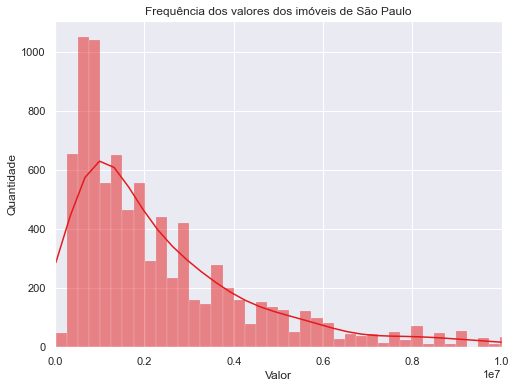

In [55]:
plt.figure(figsize=(8,6))
ax = sns.set_theme(palette='Set1')
ax = sns.histplot(data=dataset, x='Valor_anuncio', kde=True)
ax.set_title('Frequência dos valores dos imóveis de São Paulo')
ax.set_xlabel('Valor')
ax.set_ylabel('Quantidade')
plt.xlim(0, 10000000)

#### Preço do metro quadrado por bairro e plotar em um gráfico ideal

In [56]:
metragem_d = bairros_d['Metragem'].sum()
valor_anuncio_d = bairros_d['Valor_anuncio'].sum()
metro_quadrado = valor_anuncio_d / metragem_d
metro_quadrado

Bairro
Aclimação             7162.688384
Alto da Boa Vista     5708.743659
Alto da Lapa          6961.299081
Alto da Mooca         4385.002777
Alto de Pinheiros    11126.342330
                         ...     
Vila Água Funda       4283.837057
Água Branca           7065.770523
Água Fria             5604.534005
Água Funda            3920.863309
Água Rasa             3846.911370
Length: 697, dtype: float64

#### Pesquisar um visualização para analisar os quartis, mediana e outliers

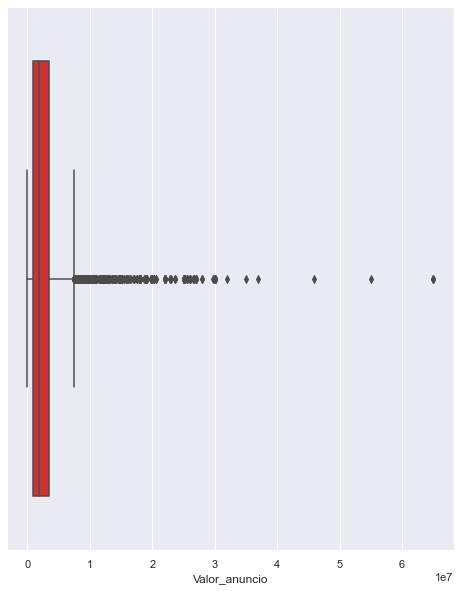

In [73]:
plt.figure(figsize=(8,10))
box = sns.boxplot(data=dataset, x='Valor_anuncio')